In [20]:
import time
import opcua
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [21]:
# url = "opc.tcp://130.159.75.138:48050"
# url = "opc.tcp://CX-696B93:4840"

# define opc server address & credentials
url = "opc.tcp://130.159.75.138:4840"
client = opcua.Client(url = url)
client.set_user(username = 'Administrator')
client.set_password(pwd = '*500TPress*')

In [22]:
# connect to the opc-ua client
client.connect()

In [23]:
# test connection using a single known node
p = client.get_node("ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_1_Ambient_Temperature_Front")
var = p.get_data_value()
print("Ambient Temperature: {} C".format(var.Value.Value))

Ambient Temperature: 20.9 C


In [24]:
# define nodes as string values
nodeid_list = ["ns=4;s=GVL_OPTO22.Press_Position",
               "ns=4;s=GVL_OPTO22.Main_Cylinder_Pressure",
               "ns=4;s=GVL_OPTO22.Bottom_Die_Temperature",
               "ns=4;s=GVL_OPTO22.Top_Die_Temperature",
               "ns=4;s=GVL_OPTO22.Bottom_Die_Heater_Power_Demand",
               "ns=4;s=GVL_OPTO22.Top_Die_Heater_Power_Demand",
               "ns=4;s=GVL_OPTO22.Pump_Pressure_Demand",
               "ns=4;s=GVL_OPTO22.Pump_Flow_Demand",
               "ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_1_Ambient_Temperature_Front",
               "ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_2_Ambient_Temperature_Back",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_1_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_2_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_3_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_4_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_5_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_6_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_7_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_8_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.rTotal_KW_MainsIncomer"]

# convert node strings values to opcua node classes
nodeid_ua = [client.get_node(nodeid) for nodeid in nodeid_list]

# test sampling opcua client with previously defined node list in single interrogation
node_vals = client.get_values(nodeid_ua)
for val in node_vals:
    print(val)

147.5
-0.27001953125
21.311649322509766
21.717880249023438
0.0
0.0
0.0
0.0
20.9
20.6
21.399999618530273
1372.0
1372.0
1372.0
1372.0
1372.0
1372.0
25.399999618530273
62.57508087158203


In [25]:
# create dataframe to store
col_names = [name.split('.')[1] for name in nodeid_list]
col_names.insert(0, "t-delta")
col_names.insert(0, "t")
df = pd.DataFrame(columns=col_names)

In [26]:
# sample opcua client and evaluate time taken to parse each sample
sample_num = 0
num_samples = 50000

while sample_num < num_samples:
    start = time.time()
    node_vals = client.get_values(nodeid_ua)
    stop = time.time()
    node_vals.insert(0, stop-start)
    node_vals.insert(0, start)
    df.loc[len(df)] = node_vals
    sample_num +=1

# disconnect to the opc-ua client
client.disconnect()

# convert unix time columns (seconds from epoch) to datetim
df['t'] = pd.to_datetime(df['t'], unit='s')

# print df head to check status of acquired data
df.head()

,t,t-delta,Press_Position,Main_Cylinder_Pressure,Bottom_Die_Temperature,Top_Die_Temperature,Bottom_Die_Heater_Power_Demand,Top_Die_Heater_Power_Demand,Pump_Pressure_Demand,Pump_Flow_Demand,...,lrEL3202_2_Ambient_Temperature_Back,nEL3318_1_Engineering_Unit,nEL3318_2_Engineering_Unit,nEL3318_3_Engineering_Unit,nEL3318_4_Engineering_Unit,nEL3318_5_Engineering_Unit,nEL3318_6_Engineering_Unit,nEL3318_7_Engineering_Unit,nEL3318_8_Engineering_Unit,rTotal_KW_MainsIncomer
0,2022-11-14 08:40:50.279307776,0.003632,147.399994,-0.23999,21.311649,21.71788,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.4,62.57526
1,2022-11-14 08:40:50.283535616,0.003334,147.399994,-0.23999,21.311649,21.71788,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.4,62.57526
2,2022-11-14 08:40:50.287708160,0.003606,147.399994,-0.23999,21.311649,21.71788,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.4,62.57526
3,2022-11-14 08:40:50.291988992,0.003328,147.399994,-0.23999,21.311649,21.71788,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.4,62.57526
4,2022-11-14 08:40:50.296032768,0.002818,147.399994,-0.23999,21.311649,21.71788,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.4,62.57526


<AxesSubplot:xlabel='t'>

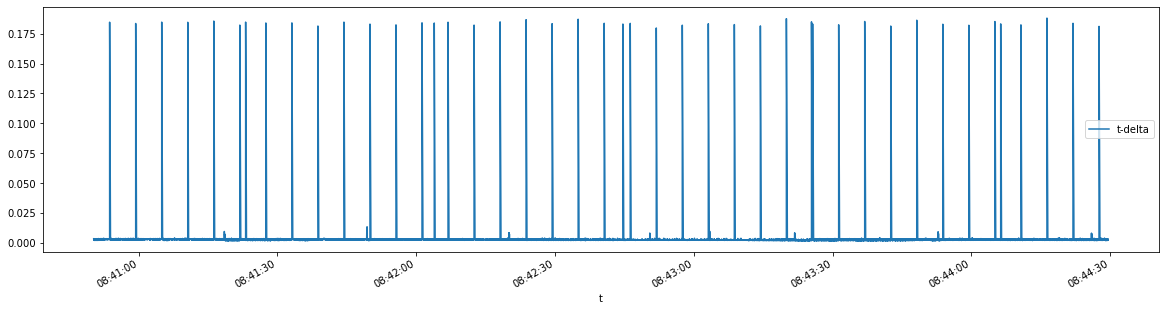

In [27]:
df.plot.line(x='t', y='t-delta', style='-')

<AxesSubplot:xlabel='t'>

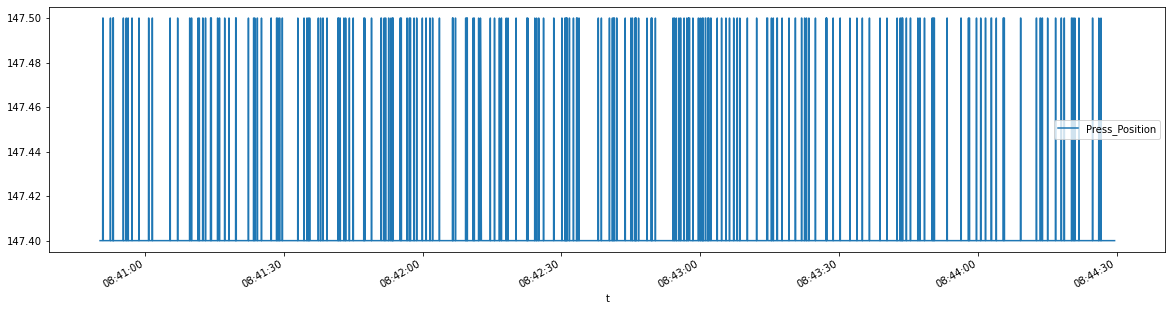

In [28]:
df.plot.line(x='t', y='Press_Position', style='-')

<AxesSubplot:xlabel='t'>

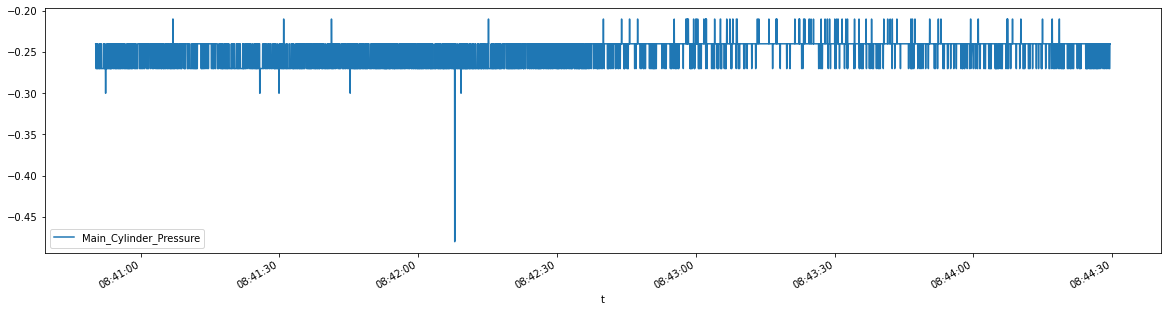

In [29]:
df.plot.line(x='t', y='Main_Cylinder_Pressure', style='-')

In [ ]:
def d3m_colab